# Home assigment 1

Please give your name below:

In [ ]:
name='Robin Vestling'

## Exercise 1

In nature Uranium is commonly available in the form of two isotopes: $^{235}U$ and $^{238}U$. Let us define Uranium enrichment as:
\begin{equation}
\epsilon= \frac{N_{^{235}U}}{N_{^{235}U}+N_{^{238}U}}
\end{equation}

where $N$ indicates the number of atoms in a given volume. The half-lives are $4.51 \times 10^9$ and $7.13 \times 10^8$ yr for $^{238}U$ and $^{235}U$, respectively. Today, the natural enrichment is $0.72 \%$, whereas a typical LWR fuel has an enrichment of $2-5 w\%$. It is notable that in the past natural uranium contained enough $^{235}U$ that LWRs could have been built without requiring further enrichment. In fact, evidance shows that cca $1.7 \times 10^9$ yr ago at certain locations such as in Oklo, Gabon the conditions were ideal for the formation of [natural nuclear fission reactors](https://en.wikipedia.org/wiki/Natural_nuclear_fission_reactor). 

- Derive the equation that describes the evolution of the enrichment in time. (hint: use markdown and Latex to document your derivation)
- Define a program function which evaluates the enrichment at a certain time in the past. The function should be able to handle array-like inputs (hint: you can use numpy). 
- Evaluate the function and print the enrichment 
    - at the birth of Earth ($4.5 \times 10^9$ years ago)
    - at the time when the Oklo reactor "operated" ($1.7 \times 10^9$ years ago)
- Plot the enrichment of uranium versus time in the past. Include a vertical line (`plt.axvline`) at the two times highlighted above


### Solution

Include your derivation here.

The amount of atoms of a given isotope is determined by:
\begin{equation*}
    N(t) = N(0)e^{-\lambda t}
\end{equation*}
Using this in the enrichment equation we get:

\begin{equation*}
\epsilon= \frac{N(0)_{^{235}U}e^{\lambda_{^{235}U}t}}{N(0)_{^{235}U}e^{\lambda_{^{235}U}t}+N(0)_{^{238}U}e^{\lambda_{^{238}U}t}}
\end{equation*}

The initial amount of atoms N(0) can be expressed in terms the initial enrichment $\epsilon(0)$, which we can set to 0.72%, which is the enrichment today. And by setting t = -t since we want to know the enrichment in the past we end up with:

\begin{equation*}
\epsilon= \frac{\epsilon(0)_{^{235}U}e^{\lambda_{^{235}U}t}}{\epsilon(0)_{^{235}U}e^{\lambda_{^{235}U}t}+(1-\epsilon(0))_{^{238}U}e^{\lambda_{^{238}U}t}}
\end{equation*}


Enrichment at the birth of Earth (4.5 billion years ago): 22.39%
Enrichment at the time of Oklo reactor (1.7 billion years ago): 2.83%


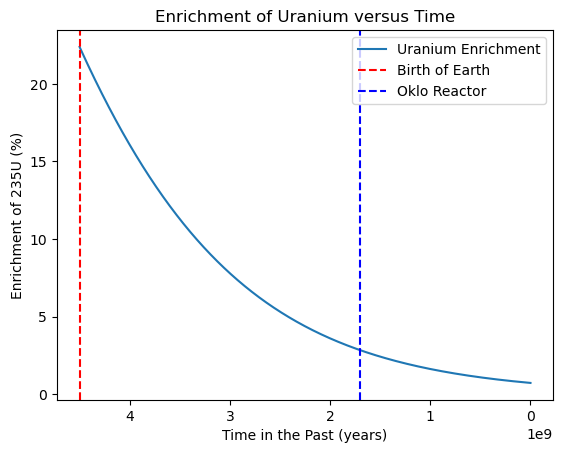

In [3]:
# include your code here

import numpy as np
import matplotlib.pyplot as plt

# Constants
hl__238U = 4.51e9  # Half-life of 238U in years
hl_235U = 7.13e8  # Half-life of 235U in years
lambda_238U = np.log(2) / hl_238U  # Decay constant for 238U
lambda_235U = np.log(2) / hl_235U  # Decay constant for 235U
epsilon_0 = 0.0072  # Current enrichment of 235U (0.72%)

def epsilon(t):
    """Function to evaluate Uranium enrichment at time t. The parameter t can be both float or array."""
    term_235U = np.exp(lambda_235U * t)
    term_238U = np.exp(lambda_238U * t)
    return (epsilon_0 * term_235U) / (epsilon_0 * term_235U + (1 - epsilon_0) * term_238U)


# Times of interest
t_beginning_of_earth = 4.5e9  # years ago
t_oklo_reactor = 1.7e9  # years ago

# Evaluate the function at the specified times
enrichment_birth_of_earth = epsilon(t_beginning_of_earth)
enrichment_oklo_reactor = epsilon(t_oklo_reactor)

# Print the results
print(f"Enrichment at the birth of Earth (4.5 billion years ago): {enrichment_beginning_of_earth * 100:.2f}%")
print(f"Enrichment at the time of Oklo reactor (1.7 billion years ago): {enrichment_oklo_reactor * 100:.2f}%")

# Plot the enrichment over time
t_values = np.linspace(0, 4.5e9, 1000)  # From present time to 4.5e9 ago
enrichment_values = epsilon(t_values)

plt.plot(t_values, enrichment_values * 100, label="Uranium Enrichment")
plt.axvline(t_beginning_of_earth, color='r', linestyle='--', label="Birth of Earth")
plt.axvline(t_oklo_reactor, color='b', linestyle='--', label="Oklo Reactor")
plt.xlabel("Time in the Past (years)")
plt.ylabel("Enrichment of 235U (%)")
plt.title("Enrichment of Uranium versus Time")
plt.legend()
plt.gca().invert_xaxis()  # Invert x-axis to show past times to the right
plt.show()
#do the printing and plotting here